In [134]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## STARTS UPS IN INDIA AND THE INVESTMENT DONE

In [135]:
df=pd.read_csv("startup_funding.csv")
df1=pd.read_csv("startup_funding.csv")
df1.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


### Easy  
##### Check for Missing Values: What percentage of each column contains missing values?
#### answer: the remarks column has the more percentage of null values then "Amount in usd " having 31.5 %and  investment vertical have least null values 

In [136]:
df1.dtypes

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object

In [137]:
df1.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [138]:
((df1.isnull().sum()/3044)*100).round(1)

Sr No                 0.0
Date dd/mm/yyyy       0.0
Startup Name          0.0
Industry Vertical     5.6
SubVertical          30.7
City  Location        5.9
Investors Name        0.8
InvestmentnType       0.1
Amount in USD        31.5
Remarks              86.2
dtype: float64

##### Standardize Date Format: Are all dates in the correct format (dd/mm/yyyy)? If not, how many need correction?
##### Answer : I TRIED TO MAKE FUNCTION HERE TO CHECK IF THERE IS COREECT FORMAT FOR DATE USING START PARASE TIME ( IT ACTUALLY USED TO  CHECK OR PARASE THE SINGLE STRING INTO dATETIME


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


### 1752 should be  need to be correct format  

In [140]:
df["Date dd/mm/yyyy"]=pd.to_datetime(df["Date dd/mm/yyyy"],errors="coerce")
df["Date dd/mm/yyyy"].isna().sum()

np.int64(1752)

In [201]:
### 1t method for checking te which re not in  proper formt
       

In [142]:
df1["Date dd/mm/yyyy"]=pd.to_datetime(df1["Date dd/mm/yyyy"],format="%d/%m/%Y",errors="coerce")
df1["Date dd/mm/yyyy"].isna().sum()

np.int64(8)

In [143]:
print(df1["Date dd/mm/yyyy"].dtype)

datetime64[ns]


#### Duplicate Rows: Are there any duplicate rows in the dataset? If so, how many?
#### ANSWER : There is no duplicate rows in the df


In [145]:
df1.duplicated().sum()

np.int64(0)

#### Average Funding Amount: Calculate the average funding amount across all startups. How does this vary by industry vertical?
#### Answer : first converting the df["Amount in USD"] column in int or float  cause there  are  no numeric values which supposed to  fet removed or fill with 0 for further calculation.
#### 1)  I firstly try to remove the "," using .str.replace 
#### 2) Then  convert it to  numeric  and  fill thr NaN with 0 for further operation i  would have removed itbut  i prefer to fill it with zero or mean 
#### 3) change the  datatype to  float to avoid theerror as  58.76 is not  converted in int  

##### Average Funding Amount: Calculate the average funding amount across all startups. How does this vary by industry vertical?

In [207]:
df1["Amount in USD"] = df1["Amount in USD"].replace(",", "")
## i  previoulsly convert the dtat into string thats why not using .stsr here as in previous code i runned the code(( df1["Amount in USD"] = df1["Amount in USD"].str.replace(",", "")
df1["Amount in USD"] = pd.to_numeric(df1["Amount in USD"], errors='coerce')
df1["Amount in USD"] = df1["Amount in USD"].astype(float)
df1["Amount in USD"]

0       200000000.0
1         8048394.0
2        18358860.0
3         3000000.0
4         1800000.0
           ...     
3039      4500000.0
3040       825000.0
3041      1500000.0
3042            0.0
3043       140000.0
Name: Amount in USD, Length: 3044, dtype: float64

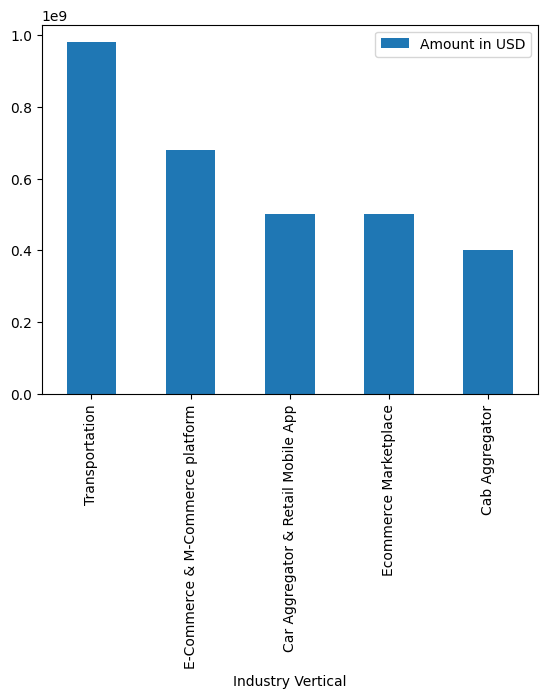

In [210]:
average_funding_by_IV=(df1.groupby("Industry Vertical")["Amount in USD"].mean().reset_index()).sort_values(by="Amount in USD",ascending=False).head(5).plot(kind="bar",x="Industry Vertical",y="Amount in USD")



### Medium Questions
##### Outlier Detection: Identify outliers in the "Amount in USD" column using the IQR method. How many outliers are detected, and what are their values?

In [152]:
Q1 =  df1["Amount in USD"].quantile(0.25)
Q2 = df1["Amount in USD"].quantile(0.50)  
Q3 = df1["Amount in USD"].quantile(0.75) 
print(Q1)
print(Q2)
print(Q3)

0.0
500000.0
4000000.0


In [153]:
IQR=Q3-Q1
print(IQR)

4000000.0


In [154]:
Lower_boundry=Q1-1.5*IQR
Upper_boundry=Q3+1.5*IQR
print(Lower_boundry)
print(Upper_boundry)

-6000000.0
10000000.0


In [155]:
#### Here the lower boundry  of funds came to be negative which is not likely acceptable so here  we have to take 0 as lower bopundry

In [156]:
Lower_boundry=0
Upper_boundry=Q3+1.5*IQR
print(Lower_boundry)
print(Upper_boundry)

0
10000000.0


<Axes: >

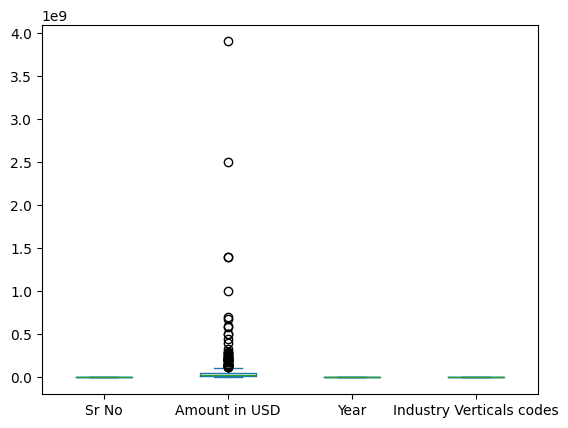

In [217]:
# Outlier=df1[df1["Amount in USD"]<Lower_boundry | df1["Amount in USD"]>Upper_boundry]
outliers = df1[(df1["Amount in USD"] < Lower_boundry)| (df1["Amount in USD"] > Upper_boundry)]
outliers.plot(kind="box")

In [158]:
len(outliers)

428

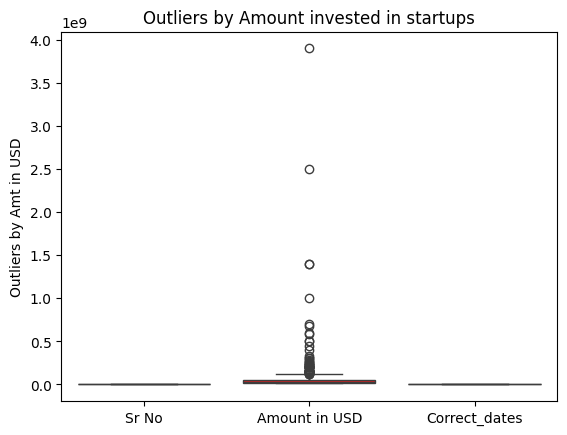

In [159]:
sns.boxplot(data=outliers,color="red")
plt.ylabel("Outliers by Amt in USD")
plt.title("Outliers by Amount invested in startups")
plt.show()

##### HERE THE OUTLIER REPRENSTED AS o AND THE RED BOX STATING THE  INQUARTILE RANGE AND DATA WITHIN WHICH IS HERE  IS ZERO AS NOW WE ARE ONLY WANT THE OUTLIERS

#### |Unique Industry Vertical Count: How many unique industry verticals are present in the dataset?

In [160]:
unique=df1["Industry Vertical"].unique()
len(unique)

822

#### Investment Type Distribution: What is the distribution of different investment types (e.g., seed funding, series A, etc.)?

In [229]:
df1["InvestmentnType"]=df1["InvestmentnType"].str.replace(r".*Seed.*", "Seed Funding", regex=True)
df1["InvestmentnType"]=df1["InvestmentnType"].str.replace(r".*Angel.*", "Seed Funding", regex=True)
# df1["City  Location"]=df1["City  Location"].str.replace(r".*Mumbai.*", "Mumbai", regex=True)


Invest_dist=df1.groupby("InvestmentnType")["InvestmentnType"].count().reset_index(name="No of investment")
Invest_dist=Invest_dist.sort_values(by="No of investment",ascending=False)
Invest_dist_top3=Invest_dist.head(3)
Invest_dist_top3

,InvestmentnType,No of investment
23,Seed Funding,1542
18,Private Equity,1356
5,Debt Funding,25


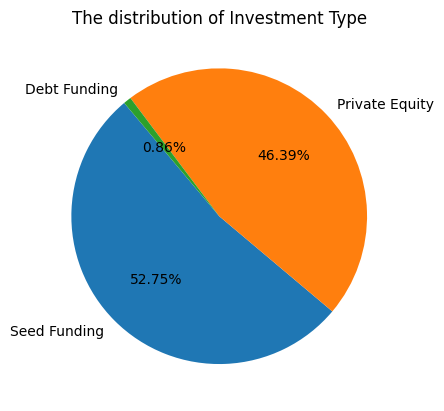

In [230]:
label=Invest_dist_top3["InvestmentnType"]
sizes=Invest_dist_top3["No of investment"]
plt.pie(sizes, labels=label, autopct='%1.2f%%', startangle=130)
plt.title("The distribution of Investment Type")
plt.show()

#### City Location Frequency: Which city has the highest number of startup fundings, and how many are there?

#### Visualization: Use a bar chart to represent the number of startups per City Location.

In [232]:
df1["City  Location"]=df1["City  Location"].str.replace(r".*New Delhi.*", "New Delhi", regex=True)
df1["City  Location"]=df1["City  Location"].str.replace(r".*Mumbai.*", "Mumbai", regex=True)
df1["City  Location"]=df1["City  Location"].str.replace("Bengaluru", "Bangalore", regex=True)
df1["Industry Vertical"]=df1["Industry Vertical"].str.replace("eCommerce", "ECommerce", regex=True)


In [239]:
CLF=(df1.groupby("City  Location")["Amount in USD"].agg(total_funding="sum", count_of_companies="size").reset_index())
CLF=CLF.sort_values(by="count_of_companies",ascending=False)
CLF=CLF.head()
CLF

,City Location,total_funding,count_of_companies
6,Bangalore,1.846017e+10,841
60,Mumbai,4.939225e+09,573
63,New Delhi,3.084817e+09,428
32,Gurgaon,3.005296e+09,287
72,Pune,6.330820e+08,105


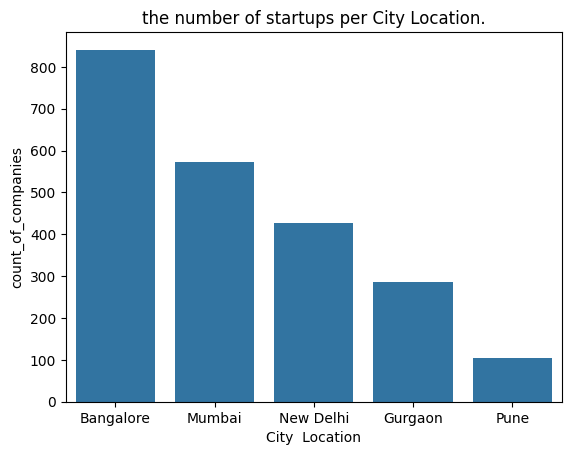

In [240]:
sns.barplot(data=CLF, x="City  Location",y="count_of_companies")
plt.title("the number of startups per City Location.")
plt.show()

#### Funding Trends Over Time: Analyze the trend of startup funding over the years. Is there a noticeable increase or decrease in total funding?

### Visualization: Use a line chart to show total funding amounts by year.

In [170]:
df1['Year'] = df1["Date dd/mm/yyyy"].dt.year


In [171]:
FTOT=df1.groupby("Year")["Amount in USD"].sum().reset_index()
FTOT

,Year,Amount in USD
0,2015.0,8.597207e+09
1,2016.0,3.828089e+09
2,2017.0,1.042931e+10
3,2018.0,5.116118e+09
4,2019.0,9.686577e+09
5,2020.0,3.902073e+08


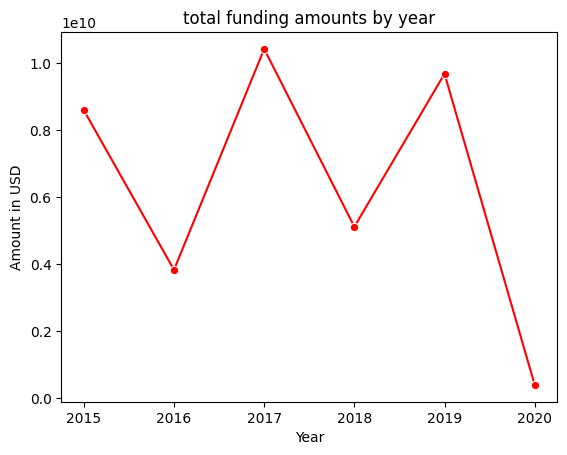

In [172]:
sns.lineplot(data=FTOT,x="Year",y="Amount in USD",marker="o",color="red")
plt.title("total funding amounts by year")
plt.show()

#### From this trend, we can say that there is a gradual decrease in the year 2020, which we can assume was caused by COVID.

## HARD

#### 1`)Correlation Analysis: Is there a correlation between the amount of investment and the industry vertical? What insights can be derived from this correlation?

##### Visualization: Use a heatmap to visualize the correlation between Amount in USD and Industry Vertical.

##### as we wabnt a corelation between categorical ab=nd the numerical  it  would not be posssib;e easily  gives us error so firsy=t we need to  convery the catergorical values it=n numeric which is done by label encoder module in scipy 

In [173]:
pip install scikit-learn

In [174]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df1["Industry Verticals codes"]= label.fit_transform(df1["Industry Vertical"])
df1["Industry Verticals codes"]

0       171
1       730
2       172
3       237
4       232
       ... 
3039    820
3040    820
3041    820
3042    820
3043    820
Name: Industry Verticals codes, Length: 3044, dtype: int64

In [175]:
corr=df1[["Amount in USD","Industry Verticals codes"]].corr()
corr

,Amount in USD,Industry Verticals codes
Amount in USD,1.000000,-0.016258
Industry Verticals codes,-0.016258,1.000000


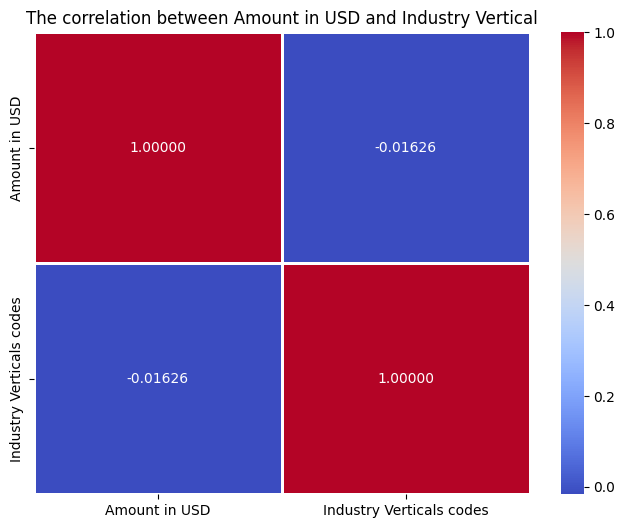

In [176]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.5f', linewidths=1)
plt.title("The correlation between Amount in USD and Industry Vertical")
plt.show()

###  from this  we can determine that the industry verticals and anmount for invstment negatively corelated with eachother 

#### 2)Investor Analysis: Which investor has made the most investments, and what is the total amount they have invested?

#### Visualization: Use a bar chart to show the total investment amount by Investors Name.

In [243]:
most_invester=df1.groupby("Investors Name")["Amount in USD"].sum().reset_index()
most_invester=most_invester.sort_values(by="Amount in USD",ascending=False)
most_invester=most_invester.head()
most_invester

,Investors Name,Amount in USD
2321,Westbridge Capital,3.900000e+09
1949,Softbank,2.500000e+09
1940,SoftBank Group,1.462000e+09
1292,"Microsoft, eBay, Tencent Holdings",1.400000e+09
2271,Vijay Shekhar Sharma,1.000150e+09


### for the seein the most investor did investment  we will take 1st top 10 investor 

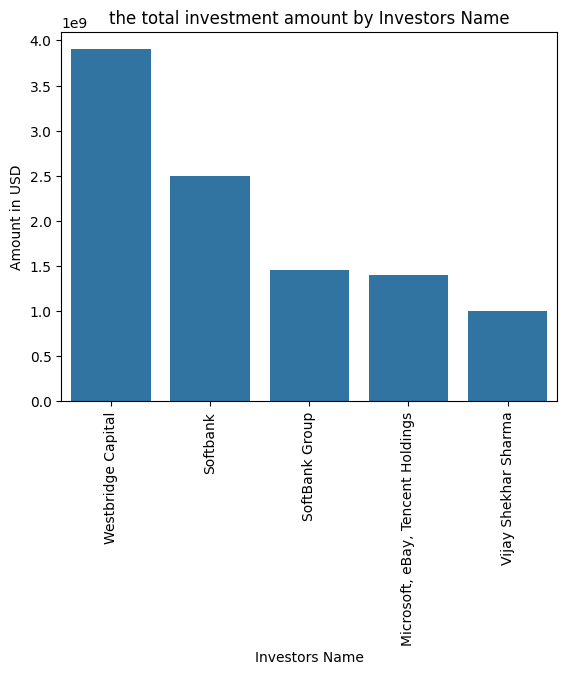

In [244]:
sns.barplot(data=most_invester,x="Investors Name",y="Amount in USD")
plt.title("the total investment amount by Investors Name")
plt.xticks(rotation=90)
plt.show()

### the westbridge capital is the invester which made most investment of 3.900000e+09 

#### 3)Funding Amount Variability: How does the variability (standard deviation) of funding amounts differ across various industry verticals?

#### Visualization: Use a bar chart to display the standard deviation of funding amounts by Industry Vertical.

In [180]:
df1["Industry Vertical"]=df1["Industry Vertical"].str.replace(r".*eCommerce	.*", "ECommerce	", regex=True)

FAV= (df1.groupby("Industry Vertical")["Amount in USD"].std().reset_index()).dropna().sort_values(by="Amount in USD",ascending=False)
FAV

,Industry Vertical,Amount in USD
730,Transportation,1.947229e+09
535,Online Marketplace,4.948736e+08
35,B2B,4.122433e+08
237,FinTech,3.259681e+08
173,ECommerce,2.027583e+08
...,...,...
25,Auto,0.000000e+00
84,Car & Bike ecommerce platform,0.000000e+00
282,Health & Fitness App,0.000000e+00
516,Online Hiring Platform,0.000000e+00


### here we got NAN  that indicatcte that there might have a one valid data point, the concept of variability does not apply.  we need to  handle NAN value to  maintain the richness of data 

#### I am dropping the NaN values or columns as they represent single values. Dropping these NaNs will not significantly affect this large dataset since we aim to calculate the standard deviation by industry vertical. Additionally, the presence of NaN indicates that these industry verticals do not have substantial or effective investments in their firms.

In [245]:
FAV=FAV.head()

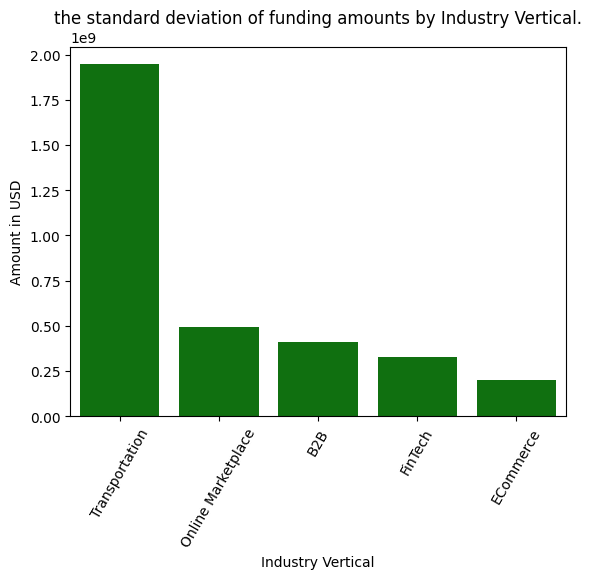

In [247]:
sns.barplot(data=FAV,x="Industry Vertical",y="Amount in USD",color="green")
plt.title("the standard deviation of funding amounts by Industry Vertical.")
plt.xticks(rotation=60)
plt.show()

### Let's identify which industry vertical has the largest variability in funding amounts .

#### The transportation industry vertical has high variability in funding, we can say that there is a higher likelihood of success for startups in this sector. The greater variability in funding could indicate a wider range of startups, some of which may have received significant investments, which could lead to higher chances of success for those well-funded startups. 

### 4)Most Funded Industry: Identify the industry vertical that received the highest total funding. What trends can be observed?

### Visualization: Use a bar chart to represent total funding amounts by Industry Vertical.

In [252]:
MFI=(df1.groupby("Industry Vertical")["Amount in USD"].sum().reset_index()).sort_values(by="Amount in USD",ascending=False)
MFI=MFI.head()
MFI

,Industry Vertical,Amount in USD
173,ECommerce,6.881331e+09
111,Consumer Internet,6.253084e+09
730,Transportation,3.916632e+09
726,Technology,2.229708e+09
239,Finance,1.971438e+09


<Axes: xlabel='Industry Vertical'>

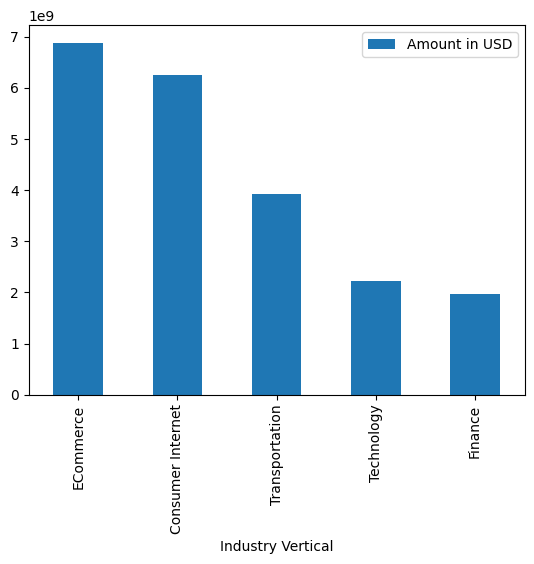

In [253]:
MFI.plot(kind="bar",x="Industry Vertical",y="Amount in USD")


#### 5)Comparative Analysis: How do funding amounts differ between different cities and industry verticals? Are certain cities or industries more lucrative?

#### Visualization: Use a heatmap or grouped bar chart to compare funding amounts across City Location and Industry Vertical.

In [191]:
df1.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks', 'Correct_dates', 'Year',
       'Industry Verticals codes'],
      dtype='object')

In [192]:
df1["City  Location"]=df1["City  Location"].str.replace(r".*New Delhi.*", "New Delhi", regex=True)
df1["City  Location"]=df1["City  Location"].str.replace(r".*Mumbai.*", "Mumbai", regex=True)
df1["City  Location"]=df1["City  Location"].str.replace("Bengaluru", "Bangalore", regex=True)
df1["Industry Vertical"]=df1["Industry Vertical"].str.replace("eCommerce", "ECommerce", regex=True)

In [193]:
CA2=(df1.groupby(["Industry Vertical","City  Location"])["Amount in USD"].sum().reset_index(name="total amount")).sort_values(by="total amount",ascending=False)
CA2

,Industry Vertical,City Location,total amount
235,ECommerce,Bangalore,6.005765e+09
965,Transportation,Bangalore,3.900000e+09
123,Consumer Internet,Bangalore,2.414368e+09
365,Finance,Mumbai,1.360000e+09
140,Consumer Internet,Mumbai,1.306580e+09
...,...,...,...
649,On-Demand Local Logistics provider,New Delhi,0.000000e+00
650,On-Demand Logistics Service,New Delhi,0.000000e+00
47,B2B marketplace for industrial goods,Mumbai,0.000000e+00
1013,\\xc2\\xa0Casual Dining restaurant Chain,New Delhi,0.000000e+00


In [259]:
CA2=CA2.head(10)
CA2

,Industry Vertical,City Location,total amount
235,ECommerce,Bangalore,6.005765e+09
965,Transportation,Bangalore,3.900000e+09
123,Consumer Internet,Bangalore,2.414368e+09
365,Finance,Mumbai,1.360000e+09
140,Consumer Internet,Mumbai,1.306580e+09
129,Consumer Internet,Gurgaon,1.094815e+09
351,FinTech,Noida,1.000000e+09
727,Online Marketplace,Bangalore,7.000000e+08
224,E-Commerce & M-Commerce platform,New Delhi,6.800000e+08
950,Technology,Mumbai,6.131415e+08


In [260]:
heat2=CA2.pivot_table(values="total amount",
                 index="City  Location",
                 columns="Industry Vertical",aggfunc="sum")

heat2

Industry Vertical,Consumer Internet,E-Commerce & M-Commerce platform,ECommerce,FinTech,Finance,Online Marketplace,Technology,Transportation
City Location,,,,,,,,
Bangalore,2.414368e+09,NaN,6.005765e+09,NaN,NaN,700000000.0,NaN,3.900000e+09
Gurgaon,1.094815e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mumbai,1.306580e+09,NaN,NaN,NaN,1.360000e+09,NaN,613141500.0,NaN
New Delhi,NaN,680000000.0,NaN,NaN,NaN,NaN,NaN,NaN
Noida,NaN,NaN,NaN,1.000000e+09,NaN,NaN,NaN,NaN


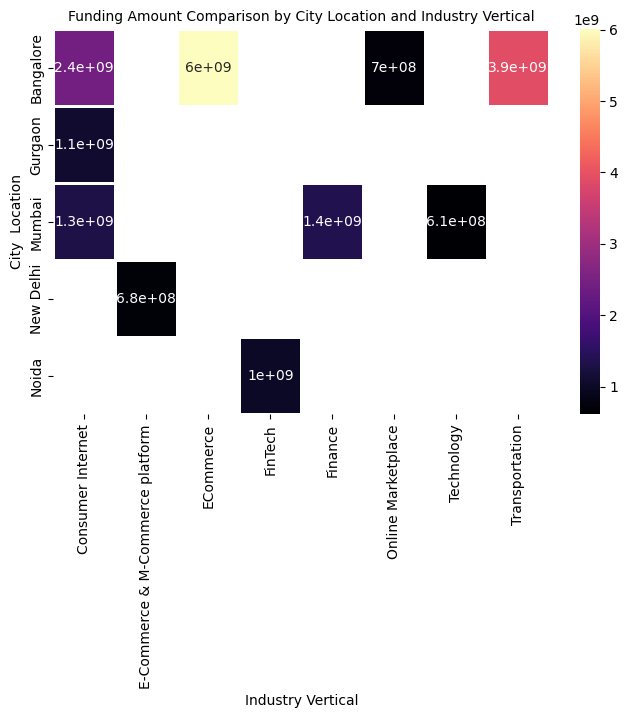

In [263]:
plt.figure(figsize=(8,5))
sns.heatmap(data=heat2,annot=True,cmap="magma",linewidth=1)
plt.title('Funding Amount Comparison by City Location and Industry Vertical',fontsize=10)
plt.show()

### GROUPED BAR CHART 

In [267]:
CA=CA2.head(5)


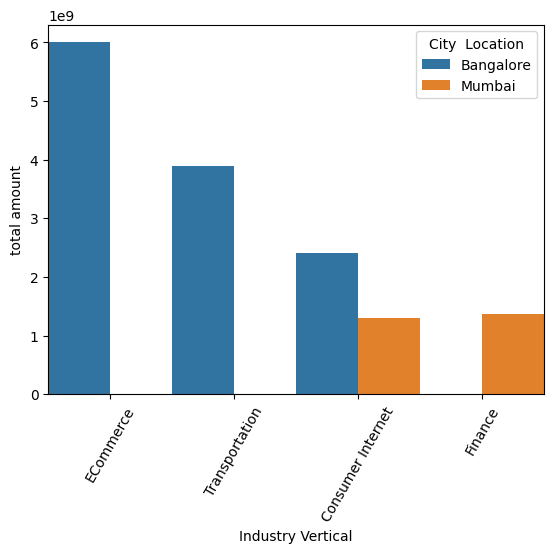

In [268]:

sns.barplot(data=CA,y="total amount",x="Industry Vertical",hue="City  Location",width=1)
plt.xticks(rotation=60)
plt.show()
